In [50]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split

In [2]:
def model(x):
    return 1 / (1 + np.exp(-x))

In [42]:
def plot_roc(test, score):
    fpr, tpr, _ = roc_curve(test, score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr

In [51]:
def plot_pr(test, score):
    average_precision = average_precision_score(test, score)
    precision, recall, _ = precision_recall_curve(test, score)

#     # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
#     step_kwargs = ({'step': 'post'}
#                    if 'step' in signature(plt.fill_between).parameters
#                    else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

In [29]:
def saga_model(data):
    X_train, X_test, y_train, y_test = data
    # Fit the classifier
    clf = linear_model.LogisticRegression(solver='saga', max_iter=1)
    clf.fit(X_train, y_train)

    # and plot the result
    plt.figure(1, figsize=(8, 6))
    plt.clf()
    plt.scatter(X_test.ravel(), y_test, color='black', zorder=20)

    loss = model(X_line * clf.coef_ + clf.intercept_).ravel()
    plt.plot(X_line, loss, color='red', linewidth=3)
    plt.show()

    test_loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
    return test_loss

In [30]:
def lbfgs_model(data):
    X_train, X_test, y_train, y_test = data
    # Fit the classifier
    clf = linear_model.LogisticRegression(C=1e4, solver='lbfgs')
    clf.fit(X_train, y_train)

    # and plot the result
    plt.figure(1, figsize=(8, 6))
    plt.clf()
    plt.scatter(X_test.ravel(), y_test, color='black', zorder=20)

    loss = model(X_line * clf.coef_ + clf.intercept_).ravel()
    plt.plot(X_line, loss, color='red', linewidth=3)
    plt.show()

    test_loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
    return test_loss

In [4]:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)
X_line = np.linspace(-5, 10, 300)

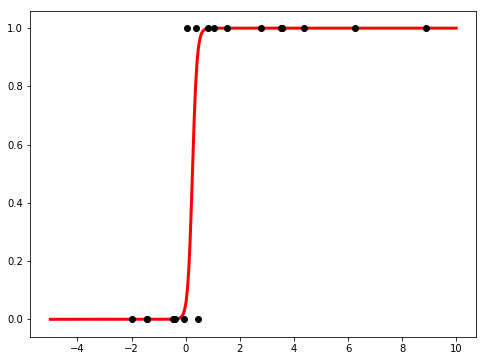

In [35]:
score1 = lbfgs_model((X_train, X_test, y_train, y_test))

[8.89044770e-02 1.00000000e+00 1.00000000e+00 9.99999672e-01
 1.80909379e-04 1.00000000e+00 1.00000000e+00 2.44236788e-09
 2.58783041e-02 1.00000000e+00 2.48805146e-09 9.98829750e-01
 2.64304464e-04 9.99929785e-01 6.22689822e-04 8.38003823e-01
 1.00000000e+00 1.00000000e+00 4.10644990e-12 9.33710842e-01]


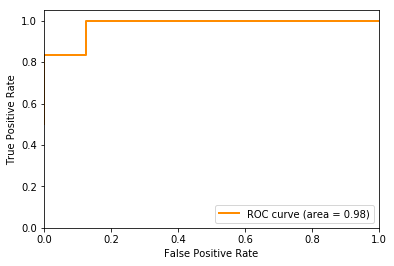

[0.    0.    0.125 0.125 1.   ] [0.5        0.83333333 0.83333333 1.         1.        ]


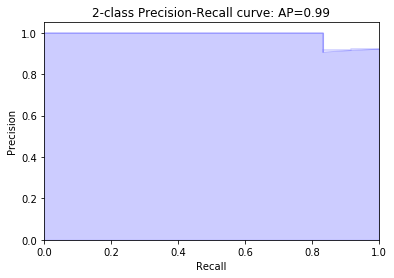

In [52]:
print(score1)
fpr, tpr = plot_roc(y_test, score1)
print(fpr, tpr)
plot_pr(y_test, score1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


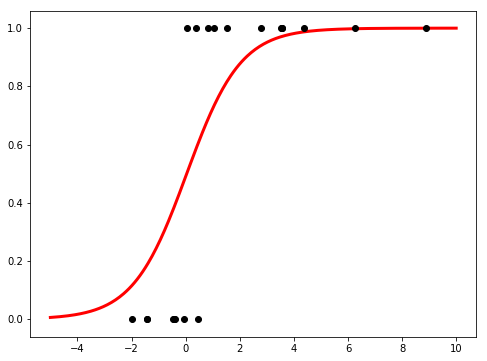

In [38]:
score2 = saga_model((X_train, X_test, y_train, y_test))

[0.50322653 0.9873476  0.97081939 0.81443267 0.37249994 0.97144699
 0.99805292 0.18631278 0.47561205 0.93953887 0.18655158 0.68654859
 0.38006051 0.73558575 0.39736521 0.58667554 0.97119801 0.9998577
 0.11744186 0.60714848]


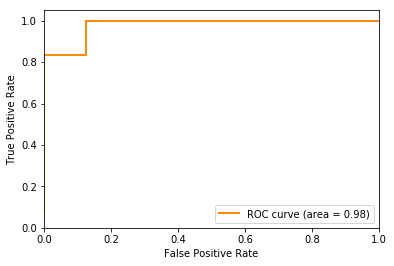

[0.    0.    0.125 0.125 1.   ] [0.08333333 0.83333333 0.83333333 1.         1.        ]


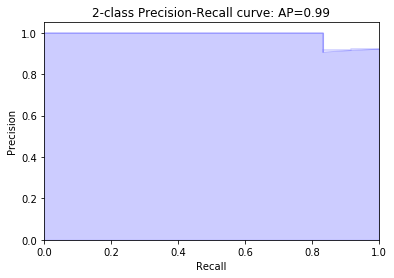

In [53]:
print(score2)
fpr, tpr = plot_roc(y_test, score2)
print(fpr, tpr)
plot_pr(y_test, score2)